In [ ]:
import numpy as np
import src.wave as wv
import matplotlib.pyplot as plt

microphone = np.linspace(2,102, 11)

# Teste 3

In [ ]:
# Comportamento espacial
pSim,pFWH,pFWH2 = wv.importData('pimpleT3', time = 0.5, case = 'monopoleFlow')
x = np.linspace(2,102,len(pSim))

plt.plot(x,pSim, label = 'Cálculo Direto')
plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Teste 3\nTempo 0.5 s')
plt.grid()
plt.legend()
plt.show()

# Comportamento temporal
for m in range(len(microphone)):
    SIM, FWH, FWH2 = wv.importData('pimpleT3', case = 'monopoleFlow', probe=m)

    ti = f'Teste 3\nComportamento temporal (r = {round(microphone[m],2)} [m])'
   
    plt.plot(SIM[0], SIM[1], 'r--', label = 'Cálculo direto', alpha = 0.5)
    plt.plot(FWH[0], FWH[1], 'b--', label = 'FWH1', alpha = 0.85)
    plt.plot(FWH2[0], FWH[1], 'g--', label = 'FWH2', alpha = 0.75)

    plt.xlabel('t [s]')
    plt.ylabel('P [Pa]') 
    plt.title(ti)

    plt.legend()
    plt.grid()
    plt.show()

# Teste 6

In [ ]:
#%% Teste 6
for m in range(len(microphone)):
    SIM, FWH, FWH2 = wv.importData('pimpleT6', case = 'monopoleFlow', probe=m)

    ti = f'Teste 6\nComportamento temporal (r = {round(microphone[m],2)} [m])'
   
    plt.plot(SIM[0], SIM[1], 'r--', label = 'Cálculo direto', alpha = 0.5)
    plt.plot(FWH[0], FWH[1], 'b--', label = 'FWH1', alpha = 0.85)
    plt.plot(FWH2[0], FWH[1], 'g--', label = 'FWH2', alpha = 0.75)

    plt.xlabel('t [s]')
    plt.ylabel('P [Pa]') 
    plt.title(ti)

    plt.legend()
    plt.grid()
    plt.show()

# Teste 9

In [ ]:
pSim,pFWH,pFWH2 = wv.importData('pimpleT9', time = 2.32, case = 'monopoleFlow')
x = np.linspace(2,102,len(pSim))

plt.plot(x,pSim, label = 'Cálculo Direto')
plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Teste 9\nTempo 2.32 s')
plt.grid()
plt.legend()
plt.show()

# Teste 10 e Teste 11

In [ ]:
T = [10,11]
for i in T:
    pSim,_,_ = wv.importData(f'pimpleT{i}', time = 0.5, case = 'monopoleFlow')
    x = np.linspace(2,102,len(pSim))

    plt.plot(x,pSim, label = 'Cálculo Direto')
    plt.xlabel('x [m]')
    plt.ylabel('p [Pa]')
    plt.title(f'Teste {i}\nTempo 0.5 s')
    plt.grid()
    plt.legend()
    plt.show()

## Teste 13 - myrhoCentralFoam

In [ ]:
import numpy as np
import wave as wv
import matplotlib.pyplot as plt

# Comportamento espacial - t = 0.5
pSim,_,_ = wv.importData('mycentralT13', time = 0.5, case = 'monopoleFlow')
x = np.linspace(2,102,len(pSim))

plt.plot(x,pSim, label = 'Cálculo Direto')
plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Teste 13\nTempo 0.5 s')
plt.grid()
plt.legend()
plt.show()

# Comportamento espacial - t = 2
pSim,_,_ = wv.importData('mycentralT13', time = 0.6, case = 'monopoleFlow')
pSim2,_,_= wv.importData('mycentralT14', time = 0.6, case = 'monopoleFlow')
x = np.linspace(2,102,len(pSim))

plt.plot(x,pSim, 'b',label = 'Malha circular')
plt.plot(x,pSim2,'r' ,label = 'Malha quadrada')
plt.xlabel('x [m]')
plt.ylabel('p [Pa]')
plt.title('Teste 13\nTempo 0.6 s')
plt.grid()
plt.legend()
plt.show()

# Comportamento temporal
microphone = np.linspace(2,102, 11)
for m in range(len(microphone)):
    SIM,_,_ = wv.importData('mycentralT13', case = 'monopoleFlow', probe=m)

    ti = f'Teste 13\nComportamento temporal (r = {round(microphone[m],2)} [m])'
   
    plt.plot(SIM[0], SIM[1], 'r--', label = 'Cálculo direto', alpha = 0.5)
    
    plt.xlabel('t [s]')
    plt.ylabel('P [Pa]') 
    plt.title(ti)

    plt.legend()
    plt.grid()
    plt.show()

# Teste da função

[]

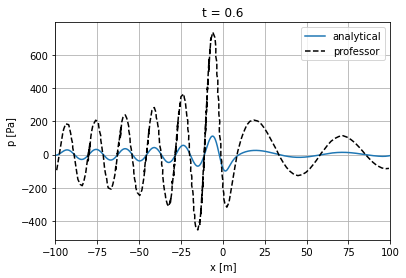

In [1]:
import numpy as np
import src.wave as wv
import matplotlib.pyplot as plt
from pathlib import Path
# Função 1
x = np.linspace(-100,100,1000)
pFlow = wv.pressureFlow(x = x)
xa, pAna = np.loadtxt(Path('data','analitic_solution.dat'), unpack=True)

plt.plot(x,pFlow, label = "analytical")
plt.plot(xa, pAna,'k--', label = 'professor')
plt.xlabel("x [m]")
plt.ylabel("p [Pa]")
plt.title("t = 0.6")
plt.xlim([-100,100])
plt.grid()
plt.legend()
plt.plot()

